<a href="https://colab.research.google.com/github/birkenkrahe/notebooksf21/blob/main/adding_details_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adding to an existing plot
We’re going to build the plot shown in figure fig:davies step by step using the graphical parameters already shown and a few ready-to-use functions that add to an existing plot without refreshing or clearing the window, in only 10 lines of code.

In the figure, data points are plotted differently depending on their relative position to the “sweet spot”:

- Points with $y>5$ are marked with a purple $×$ (`pch=4`)
- Points with $y<-5$ are marked with a green $+$ (`pch=3`)
- Points with $y∈[-5,5]$ but outside the sweet spot are marked $ˆ$
- Point in the sweet spot with $x∈[5,15]$ and $y∈[-5,5]$ are marked with a blue $•$
- To delineate the sweet spot, we use thick (`lwd=2`) dashed (`lty=2`) red lines
- The sweet spot is named and labeled (`text()`) with an arrow (`arrows()`)
- There is a `legend()` explaining point and line types

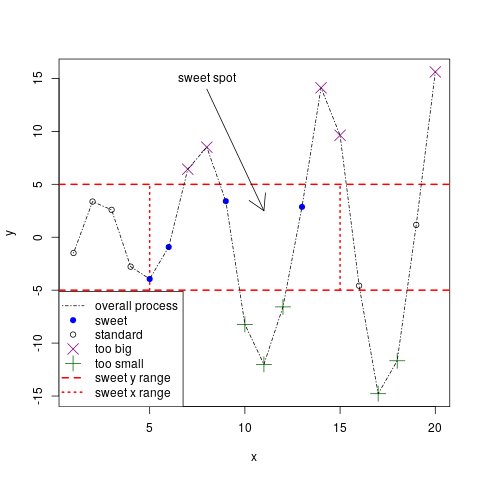

# Data
We add two hypothetical vectors and plot them using only default settings of `plot()`.
```
## define x and y vectors for 20 (x,y) locations
x <- 1:20
y <- c(-1.49, 3.37, 2.59, -2.78, -3.94, -0.92,
       6.43, 8.51, 3.41, -8.23, -12.01, -6.58,
       2.87, 14.12, 9.63, -4.58, -14.78,-11.67,
       1.17, 15.62)
plot(x,y)
```


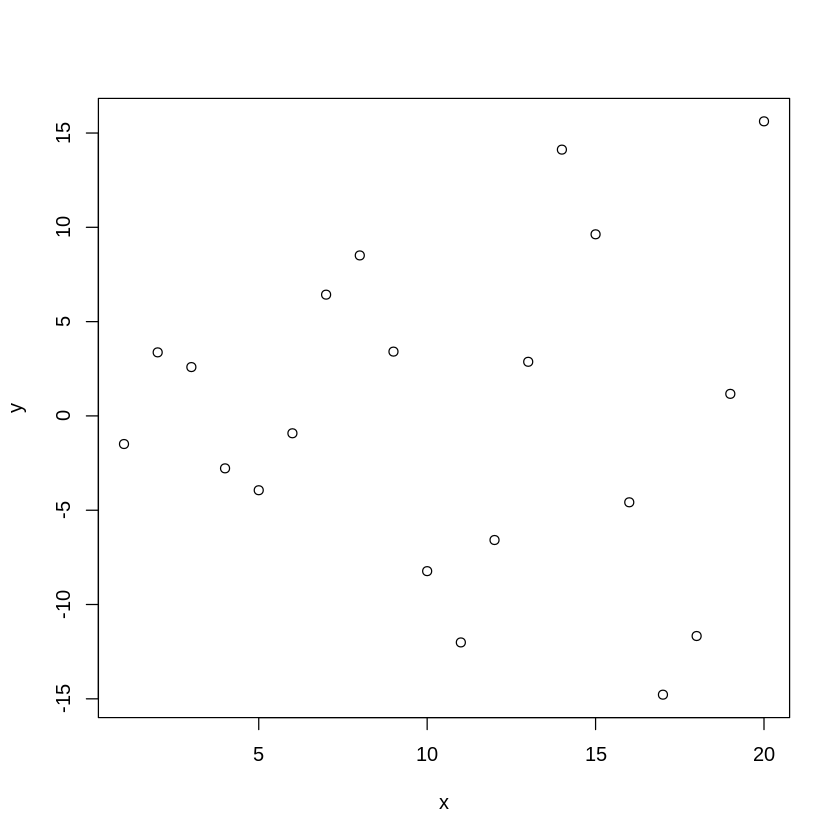

In [2]:
## define x and y vectors for 20 (x,y) locations
x <- 1:20
y <- c(-1.49, 3.37, 2.59, -2.78, -3.94, -0.92,
       6.43, 8.51, 3.41, -8.23, -12.01, -6.58,
       2.87, 14.12, 9.63, -4.58, -14.78,-11.67,
       1.17, 15.62)
plot(x,y)

# Create empty region
Create an empty plotting region to add points and draw lines but don’t plot anything. The title and the labels should also be empty.


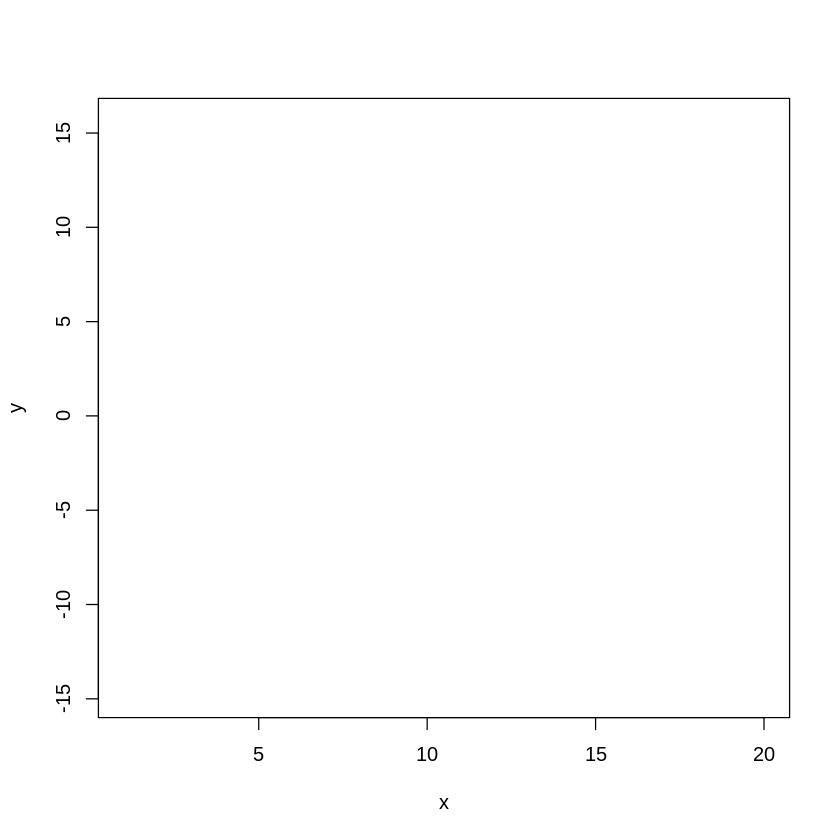

In [3]:
## create region for plot without plotting anthing
plot(x,y, type="n", main="", xlab="", ylab="")

# Add horizontal lines
Add straight lines spanning a plot using `abline()`. Specify values for intercept (`a=`) and slope (`b=`), or just add horizontal or vertical lines. The code below adds two separate horizontal lines at $y=5$ and $y=-5$ using the parameter h=c(-5,5). We want the lines red, dashed and with double thickness. 
```
abline(h=c(-5,5), col="red", lty=2, lwd=2)
```

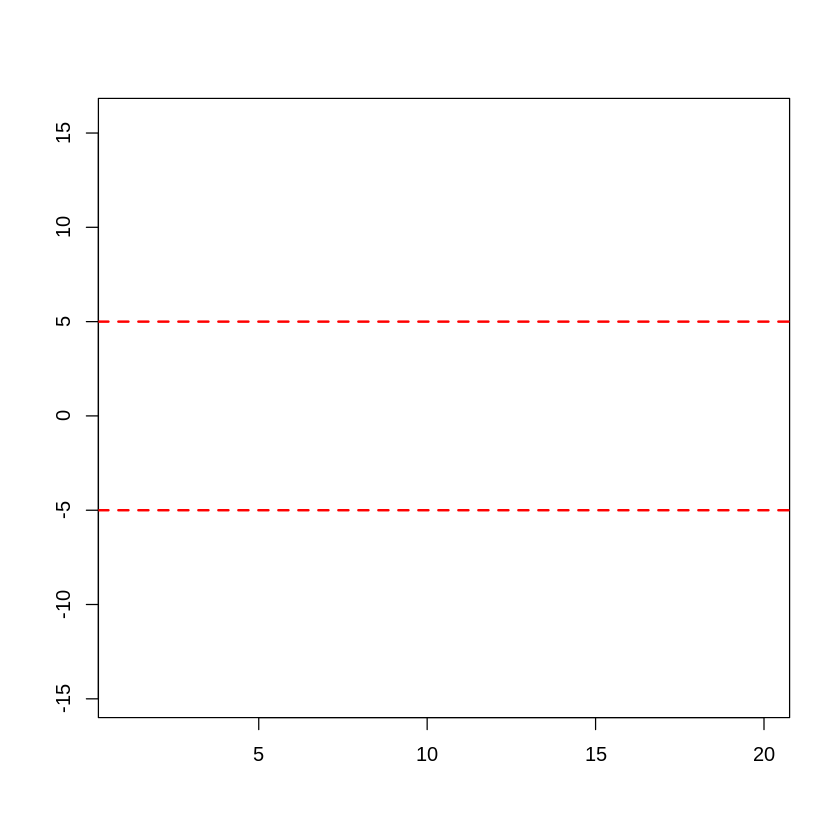

In [5]:
plot(x,y, type="n", main="", xlab="", ylab="")
abline(h=c(-5,5), col="red", lty=2, lwd=2)

Note that calling `abline()` without `plot()` will not work because the function requires a (new) plot object.

# Add vertical segments
Add shorter vertical lines to form a box for the “sweet spot”. We use segments since we don’t want the lines to span the whole region. segments takes a “from” coordinate (`x0` and `y0`) and a “to” coordinate (`x1` and `y1`). The vector-oriented behavior of R matches the two sets of coordinates - e.g. from $(5,-5)$ to $(5,5)$ for the first line. 
```
## add segment from x in [5,15] to y in [-5,5]
segments(
    x0=c(5,15), y0=c(-5,-5), # draw from x0,y0 to
    x1=c(5,15), y1=c(5,5),   # x1,y1
    col="red",
    lty=3,
    lwd=2)
    ```


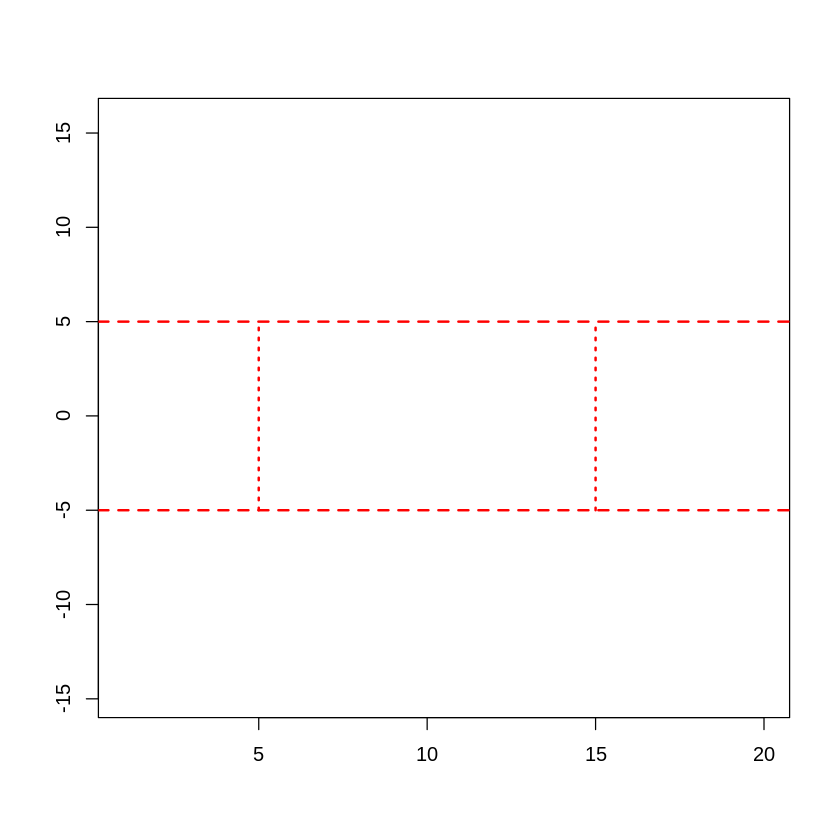

In [7]:
plot(x,y, type="n", main="", xlab="", ylab="")
abline(h=c(-5,5), col="red", lty=2, lwd=2)

## add segment from x in [5,15] to y in [-5,5]
segments(
    x0=c(5,15), y0=c(-5,-5), # draw from x0,y0 to
    x1=c(5,15), y1=c(5,5),   #           x1,y1
    col="red",
    lty=3,
    lwd=2)

Note that the left segment goes from `(x0[1],y0[1])=(5,-5)` to (`x1[1],y1[1])=(5,5)`, and the right segment goes from `(x0[2],y0[2])=(15,-5)` to `(x1[2],y1[2])=(15,5)`.

So to draw only the left or the right line, the following commands would also apply:
```
segments(x0=5, y0=-5,x1=5, y1=5)
segments(x0=15,y0=-5,x1=15,y1=5)
```

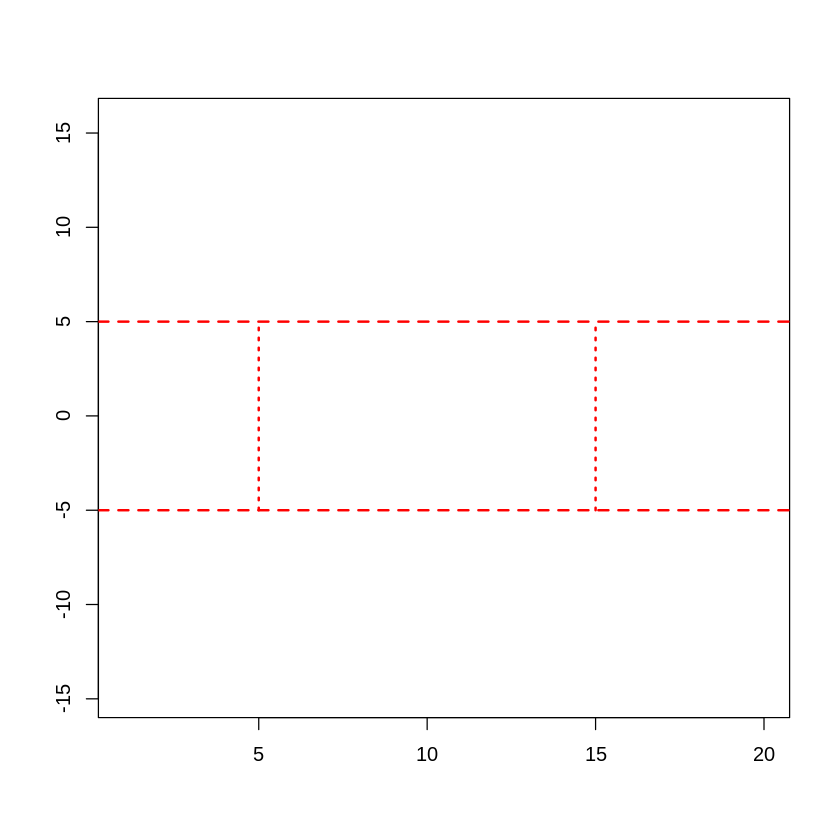

In [11]:
plot(x,y, type="n", main="", xlab="", ylab="")
abline(h=c(-5,5), col="red", lty=2, lwd=2)

segments(x0=5, y0=-5,x1=5, y1=5,col="red",lty=3,lwd=2)
segments(x0=15,y0=-5,x1=15,y1=5,col="red",lty=3,lwd=2)

# Add upper points
Use the function points to extract specific coordinates from the data vectors `x` and `y` to the plot. Like `plot()`, `points()` takes two arguments of equal length with $x$ and $y$ values.

Use logical subsetting to identify and extract elements where $y\geq5$, add them as purple $×$ symbols (`pch=4`), enlarged by a factor `2` with `cex`.

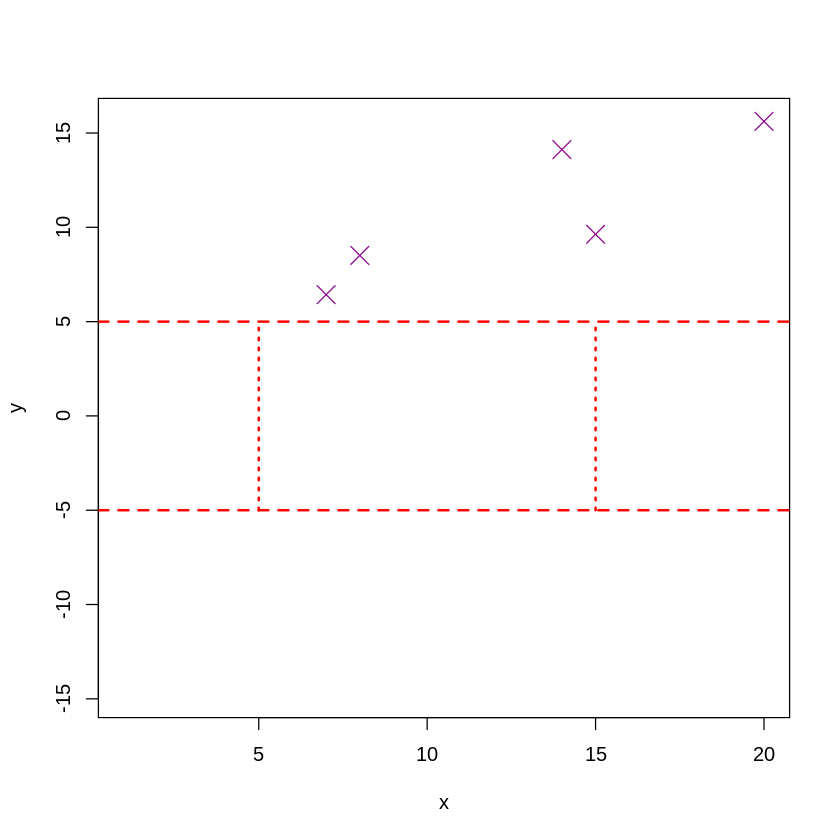

In [12]:
plot(x,y, type="n", main="")
abline(h=c(-5,5), col="red", lty=2, lwd=2)
segments(x0=c(5,15),y0=c(-5,-5), x1=c(5,15), y1=c(5,5),col="red",lty=3,lwd=2)

## Add points with y greater or equal 5
points(x[y>5], y[y>5],
       pch=4,
       col="darkmagenta",
       cex=2)

# Add lower points
Extract points from the vectors with $y\leq-5$ using enlarged, `darkgreen` $+$ symbols (`pch=3`).

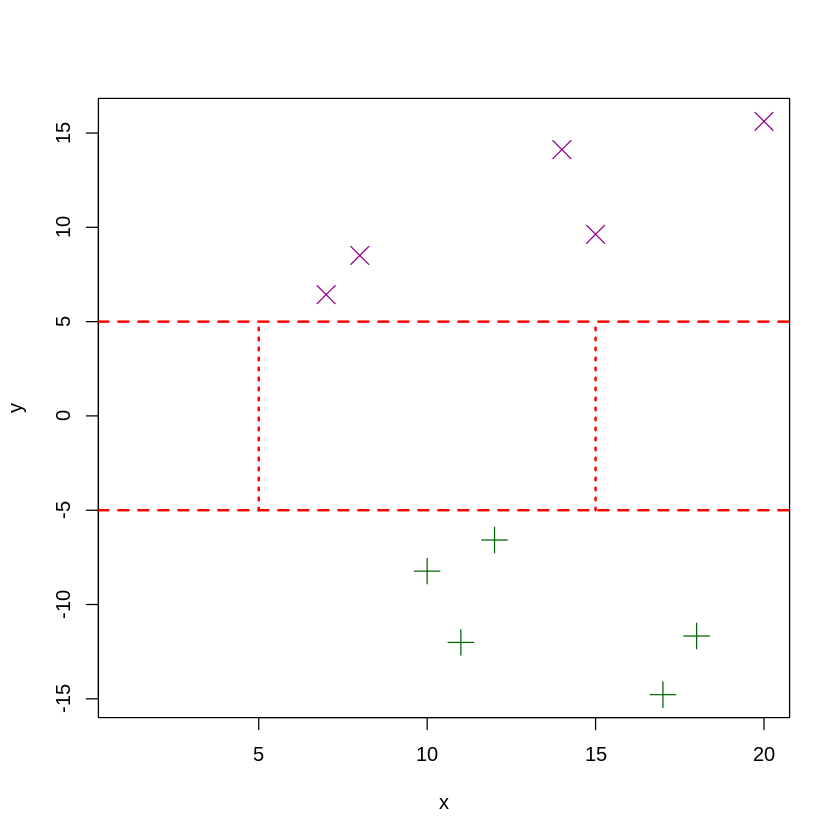

In [13]:
plot(x,y, type="n", main="")
abline(h=c(-5,5), col="red", lty=2, lwd=2)
segments(x0=c(5,15),y0=c(-5,-5), x1=c(5,15), y1=c(5,5),col="red",lty=3,lwd=2)
points(x[y>5], y[y>5],pch=4, col="darkmagenta",cex=2)

## Add points with y smaller or equal -5
points(x[y<=-5], y[y<=-5],
       pch=3, 
       col="darkgreen", 
       cex=2)

# Add sweet spot points
Extract points in the segment drawn before. These points fulfil the condition $x∈[5,15] ∪ y∈[-5,5]$. Plot them as full `blue` $•$ signs (`pch=19`).

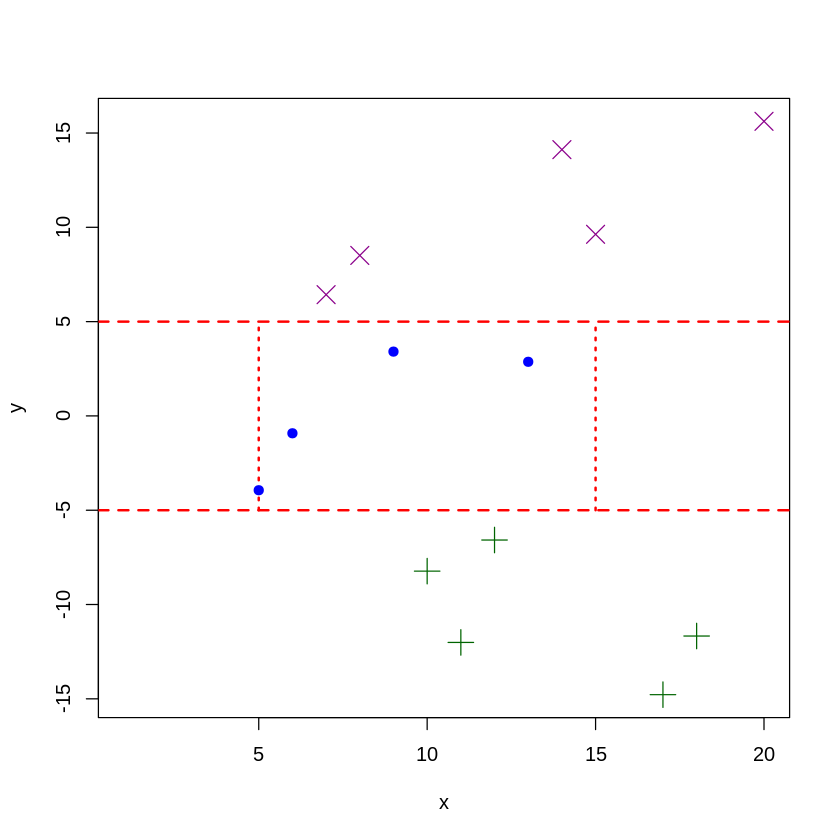

In [14]:
plot(x,y, type="n", main="")
abline(h=c(-5,5), col="red", lty=2, lwd=2)
segments(x0=c(5,15),y0=c(-5,-5), x1=c(5,15), y1=c(5,5),col="red",lty=3,lwd=2)
points(x[y>5], y[y>5],pch=4, col="darkmagenta",cex=2)
points(x[y<=-5], y[y<=-5],pch=3,col="darkgreen", cex=2)

## Add points inside the segment
points(x[(x>=5&x<=15)&(y>=-5&y<=5)],
       y[(x>=5&x<=15)&(y>=-5&y<=5)],
       pch=19,col="blue")

Add remaining points
All remaining points satisfy the condition: $x<5$ or $x>15$, and $y∈(-5,5)$. Draw them with default values.

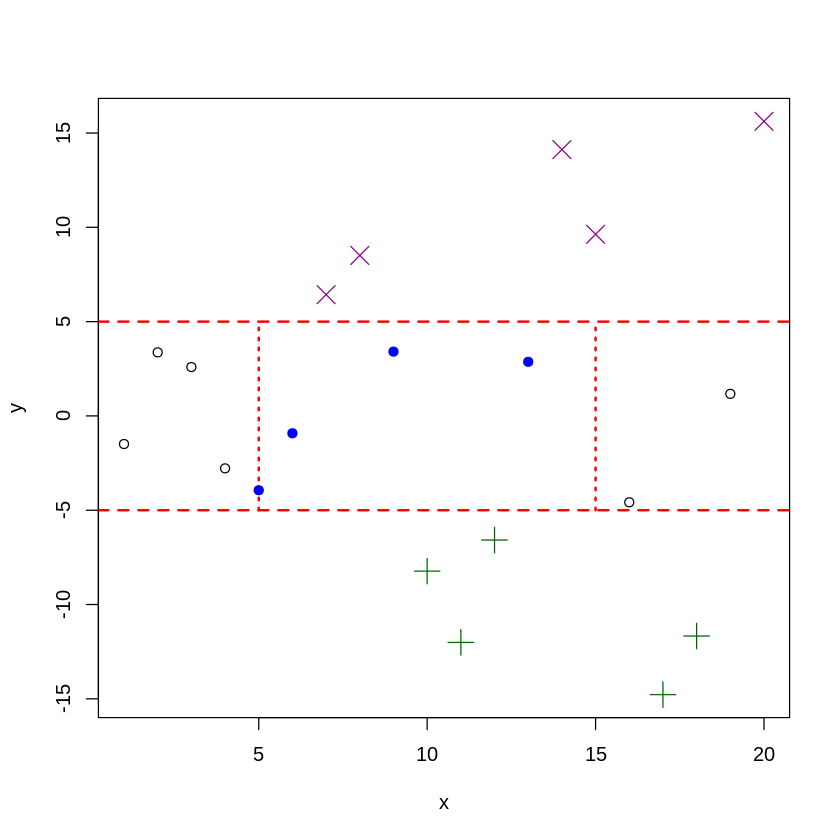

In [15]:
plot(x,y, type="n", main="")
abline(h=c(-5,5), col="red", lty=2, lwd=2)
segments(x0=c(5,15),y0=c(-5,-5), x1=c(5,15), y1=c(5,5),col="red",lty=3,lwd=2)
points(x[y>5], y[y>5],pch=4, col="darkmagenta",cex=2)
points(x[y<=-5], y[y<=-5],pch=3,col="darkgreen", cex=2)
points(x[(x>=5&x<=15)&(y>=-5&y<=5)],y[(x>=5&x<=15)&(y>=-5&y<=5)], pch=19,col="blue")

## Add remaining points x<5 or x>15 AND y in (-5,5)
points(x[(x<5|x>15)&(y>-5&y<5)],
       y[(x<5|x>15)&(y>-5&y<5)])

# Draw lines
Use `lines()` to draw lines connecting the coordinates in `x` and `y`. Draw them in dash-dot-dash style (`lty=4`).
```
## draw lines
lines(x,y,lty=4)
```


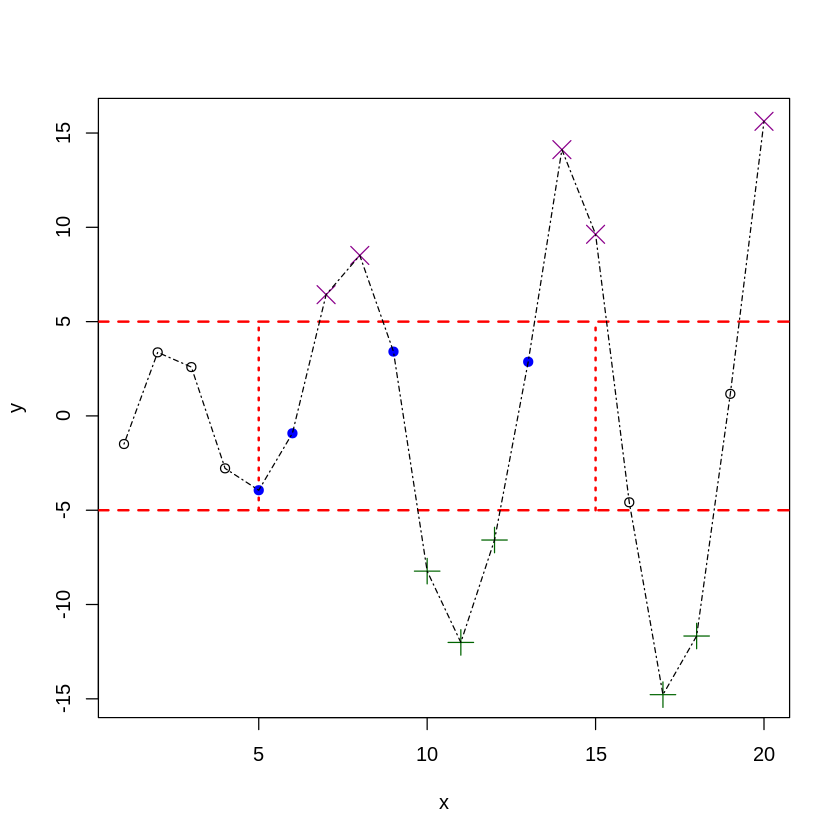

In [16]:
plot(x,y, type="n", main="")
abline(h=c(-5,5), col="red", lty=2, lwd=2)
segments(x0=c(5,15),y0=c(-5,-5), x1=c(5,15), y1=c(5,5),col="red",lty=3,lwd=2)
points(x[y>5], y[y>5],pch=4, col="darkmagenta",cex=2)
points(x[y<=-5], y[y<=-5],pch=3,col="darkgreen", cex=2)
points(x[(x>=5&x<=15)&(y>=-5&y<=5)],y[(x>=5&x<=15)&(y>=-5&y<=5)], pch=19,col="blue")
points(x[(x<5|x>15)&(y>-5&y<5)],y[(x<5|x>15)&(y>-5&y<5)])

## draw lines
lines(x,y,lty=4)

# Add arrow pointing to the sweet spot
The function `arrows()` is used just like `segments()` with limiting coordinate pairs $(x0,y0)$ and $(x1,y1)$. The arrow head is by default pointed at the “to” coordinate - check `?arrows` to find out how to alter this.

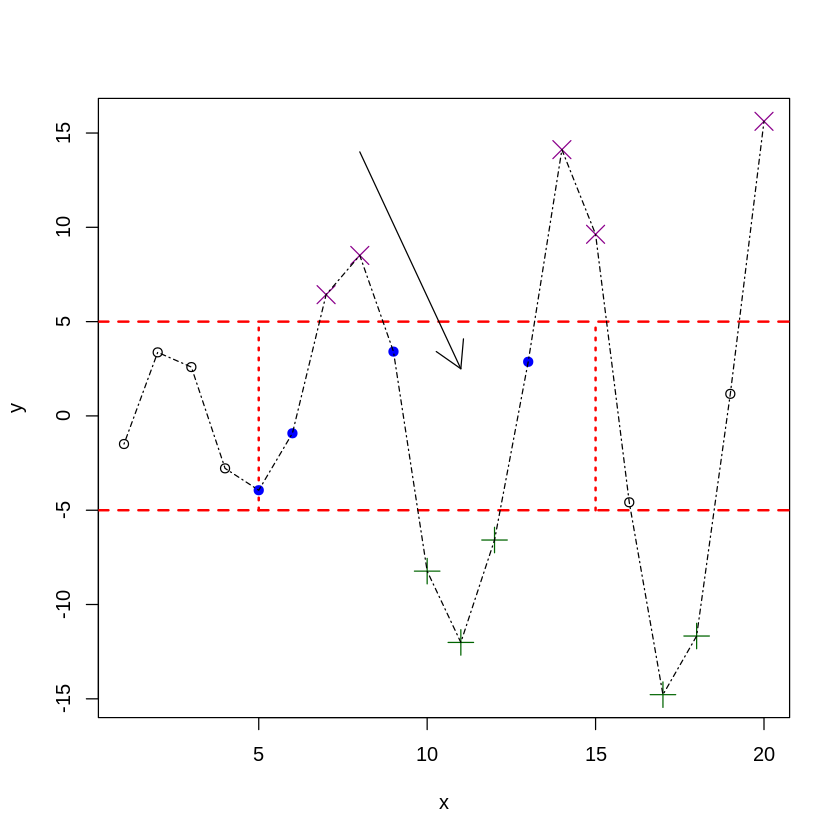

In [17]:
plot(x,y, type="n", main="")
abline(h=c(-5,5), col="red", lty=2, lwd=2)
segments(x0=c(5,15), y0=c(-5,-5), x1=c(5,15), y1=c(5,5),
         col="red", lty=3, lwd=2)
points(x[y>5], y[y>5], pch=4,
       col="darkmagenta", cex=2)
points(x[y<=-5], y[y<=-5], pch=3,
       col="darkgreen", cex=2)
points(x[(x>=5&x<=15)&(y>=-5&y<=5)],
       y[(x>=5&x<=15)&(y>=-5&y<=5)],
       pch=19,col="blue")
points(x[(x<5|x>15)&(y>-5&y<5)],
       y[(x<5|x>15)&(y>-5&y<5)])
lines(x,y,lty=4)

## add arrow
arrows(x0=8, y0=14, x1=11,y1=2.5)

**Question**: How is the kind of arrow to be drawn determined?

**Answer**: To influence how the arrow is drawn, use the attribute `code` - see `?arrow`.

# Print label at top of arrow
Print label on the plot at the top of the arrow using the function `text()`. The text is added using the attribute `labels=`. By default, it is centered on the given coordinates `x` and `y`.



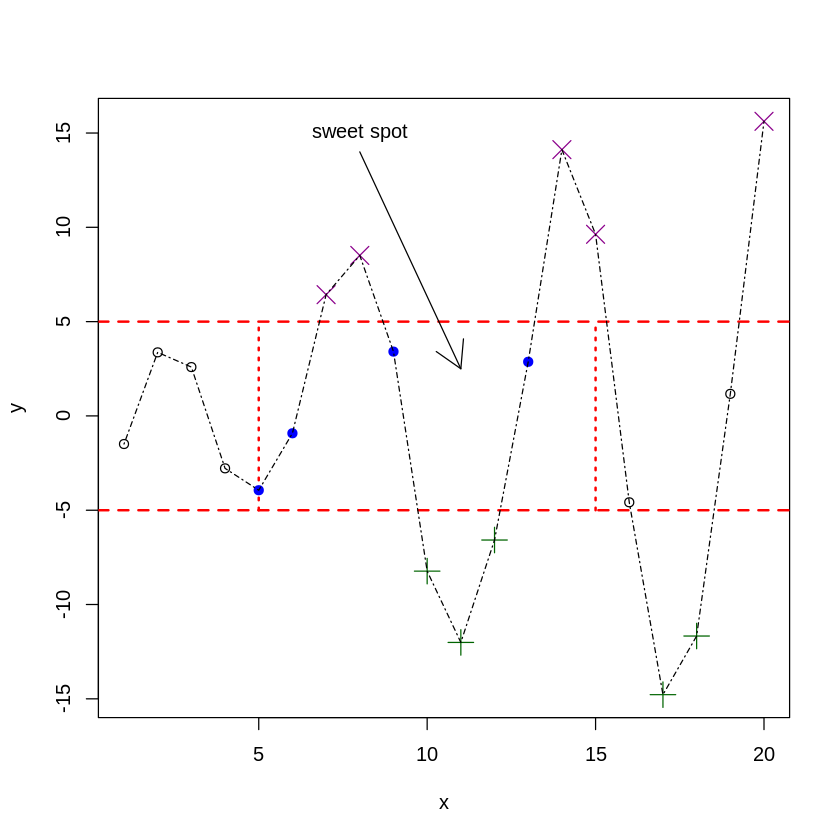

In [19]:
plot(x,y, type="n", main="")
abline(h=c(-5,5), col="red", lty=2, lwd=2)
segments(x0=c(5,15), y0=c(-5,-5), x1=c(5,15), y1=c(5,5),
         col="red", lty=3, lwd=2)
points(x[y>5], y[y>5], pch=4,
       col="darkmagenta", cex=2)
points(x[y<=-5], y[y<=-5], pch=3,
       col="darkgreen", cex=2)
points(x[(x>=5&x<=15)&(y>=-5&y<=5)],
       y[(x>=5&x<=15)&(y>=-5&y<=5)],
       pch=19,col="blue")
points(x[(x<5|x>15)&(y>-5&y<5)],
       y[(x<5|x>15)&(y>-5&y<5)])
lines(x,y,lty=4)
arrows(x0=8, y0=14, x1=11,y1=2.5)

## add arrow label
text(x=8, y=15, labels="sweet spot")

# Print legend
The command to print a legend is shown below. Transfer it to a code cell below the given code to see the final result. 

The `NA` values are necessary in the vector definitions, because graphical vectors have to have the same length.

```
legend("bottomleft",
       legend=c("overall process", "sweet",
                "standard", "too big",
                "too small", "sweet y range",
                "sweet x range"),
       pch=c(NA,19,1,4,3,NA,NA),
       lty=c(4,NA,NA,NA,NA,2,3),
       col=c("black","blue","black",
             "darkmagenta","darkgreen","red","red"),
       lwd=c(1,NA,NA,NA,NA,2,2),
       pt.cex=c(NA,1,1,2,2,NA,NA))
```

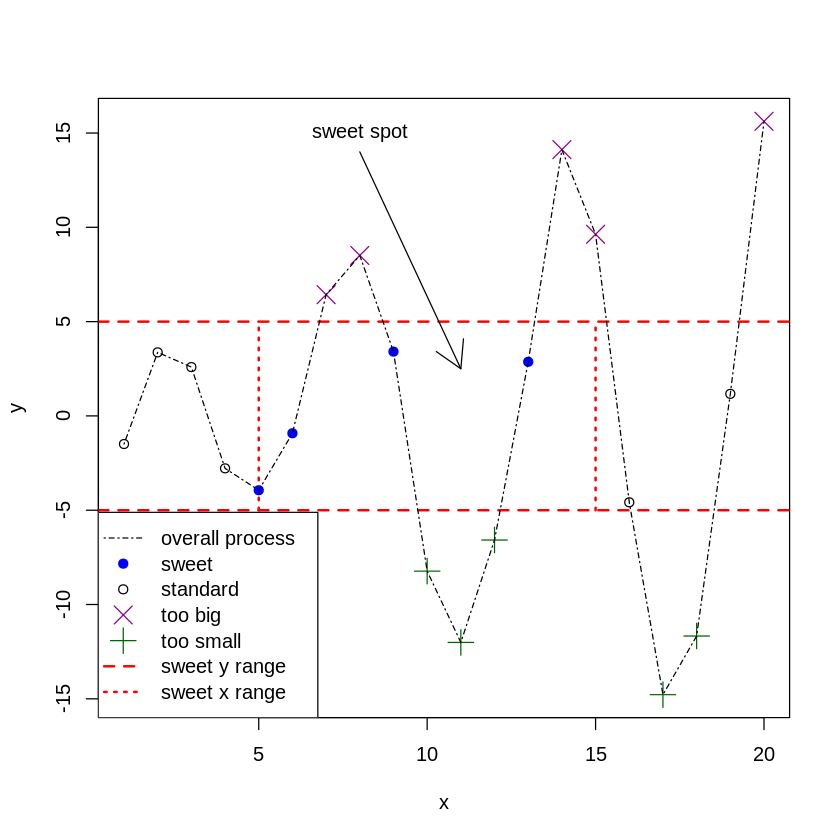

In [20]:
x <- 1:20
y <- c(-1.49, 3.37, 2.59, -2.78, -3.94, -0.92,
       6.43, 8.51, 3.41, -8.23, -12.01, -6.58,
       2.87, 14.12, 9.63, -4.58, -14.78, -11.67,
       1.17, 15.62)
plot(x,y, type="n", main="")
abline(h=c(-5,5), col="red", lty=2, lwd=2)
segments(x0=c(5,15), y0=c(-5,-5), x1=c(5,15), y1=c(5,5),
         col="red", lty=3, lwd=2)
points(x[y>5], y[y>5], pch=4, col="darkmagenta", cex=2)
points(x[y<=-5], y[y<=-5], pch=3, col="darkgreen", cex=2)
points(x[(x>=5&x<=15)&(y>=-5&y<=5)],
       y[(x>=5&x<=15)&(y>=-5&y<=5)],pch=19,col="blue")
points(x[(x<5|x>15)&(y>-5&y<5)],
       y[(x<5|x>15)&(y>-5&y<5)])
lines(x,y,lty=4)
arrows(x0=8, y0=14, x1=11,y1=2.5)
text(x=8, y=15, labels="sweet spot")

## add legend
legend("bottomleft",
       legend=c("overall process", "sweet",
                "standard", "too big",
                "too small", "sweet y range",
                "sweet x range"),
       pch=c(NA,19,1,4,3,NA,NA),
       lty=c(4,NA,NA,NA,NA,2,3),
       col=c("black","blue","black",
             "darkmagenta","darkgreen","red","red"),
       lwd=c(1,NA,NA,NA,NA,2,2),
       pt.cex=c(NA,1,1,2,2,NA,NA))

# References
Davies TM (2016). The Book of R. NoStarch Press.